<a href="https://colab.research.google.com/github/deerosa01/studentprojects/blob/master/CIS_3120_Term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name: Evaluating the NYC Housing Market over a 10-Year Period**

**Group Lead Name:**  Brian Rodriguez

**Group Members:**    Brian Rodriguez, Darlene Rosa, Umid Saidinov


---
**Project Description:** We will be analyzing census data for New York City from 2010 and 2020 to analyze the changes in occupancy rate, vacancy rate, average household size, and population within the 5 boroughs of NYC. Although we will be looking at all 5 boroughs, we are interested in knowing whether Brooklyn or Manhattan had the biggest change over the 10 year period. By analyzing this data, we can see how the variances in population since 2010 and hypothesize how factors such as the COVID-19 pandemic have impacted the housing market in 2020.

**Data Description:** Our data came from an Excel file on the 2020 Census page from the NYC.gov website. Due to changes made by the admin of the Excel file, we decided to use our local file, rather than the web-scraped file, to prevent errors in our code if future changes were to occur. By using Excel, we can sort and visualize data to help us understand how data would be presented when it is coded within python. Using Python, we cleaned the data and created data frames to help us organize column titles to use in code. By using column titles we can visualize our data in python.

**Contributions:**

Brian Rodriguez - In Part 1, since we are using an excel file for our project, I have web scrapped a line of text from the website. In Part 2 and 3, I worked alongside the team to decide what data will be used and sorted excel file to understand what data will be needed. In Part 4 I created several charts visualizing data extracted from part 2 using matplotlib and plotly. I worked on graphs 1, 3, 6, 7, 10, 12.

Darlene Rosa - In Part 1, I located and web-scrapped the excel file that we will be using as our data set for this project. In Part 2, I sorted and formatted the excel sheet so that we can only see the data that we will be using. I created several dataframes and variables that we would need for later parts of our project. In Part 3, I organized dataframes to display different sets of data that will need to be visualized. Organizing the data helped my team understand which columns of the excel file will be used. In Part 4a, I created pivot tables from our dataframes. In Part4b, I used matplotlib to create graphs 2, 4, 5, 8, 9, 11.

Umid Saidinov - In Part 1, I worked on importing the excel file into the google colab. Due to issues, I also worked on having a local file work with our program. In part 2, I imported the data that was sorted by my team members into python. I worked on code that would make each column usable by title in python, this made it easier for my team members to visualize and create tables from the data. In part 3, I loaded data the necessary data into python by creating data tables. In part 4, I helped my team members visualize the data and contributed by fixing errors in code that were faced in the google colab. 

**Data Source Link:** 
*   https://www1.nyc.gov/site/planning/planning-level/nyc-population/nyc-population.page

> 2020 Data for NYC, Boros, CDs, NTAs, & Tracts




**Refrences/Citations:**


1.  https://nypost.com/article/nyc-real-estate-market-housing-prices/
2.  https://streeteasy.com/blog/q3-2020-market-reports/
3.  https://datatofish.com/select-rows-pandas-dataframe/
4.  https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
5.  https://pandas.pydata.org/docs/user_guide/index.html
6.  https://plotly.com/python/bar-charts/





# Part 1: Web Scrapping

In [ ]:
#Importing python libraries and packages
!pip install cssselect
!pip install -q xlrd
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install plotly

In [ ]:
from lxml import html
import requests
import bs4
from bs4 import BeautifulSoup

response = requests.get('https://www1.nyc.gov/site/planning/planning-level/nyc-population/2020-census.page')
doc = html.fromstring(response.text)
title = doc.cssselect('h1')[0].text_content()
print("The group project name is:", title, '\n')

url = 'https://www1.nyc.gov/site/planning/planning-level/nyc-population/nyc-population.page'
headers = {'User-Agent' : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.2 Safari/605.1.15"
}
r = requests.get(url,{'headers': headers})
soup = bs4.BeautifulSoup(r.text,'html.parser')
soup.find_all('div',{'class': 'text-box'})[-1].find_all('p')[0].text

The group project name is: 2020 Census 



'The  enumerated population of New York City’s was 8,804,190 as of April 1, 2020, a  record high population. This is an increase of 629,057 people since the 2010  Census.'


#Part 2a: NumPy | 2b: Pandas


In [ ]:
#Reading a Microsoft Excel file and analyzing the dataset
import pandas as pd
import numpy as np
xls = pd.ExcelFile('https://www1.nyc.gov/assets/planning/download/office/planning-level/nyc-population/census2020/nyc_decennialcensusdata_2020_2010.xlsx')
xls_about = pd.read_excel(xls, 'About')
xls_census = pd.read_excel(xls, '2010, 2020, and Change', skiprows=[0,1,2], usecols=['GeoID','Borough','Name','Pop_10','Pop_10P','HHPop_10','HHPop_10P','AvHHSz_10','Hsp_10','Hsp_10P','WNH_10','WNH_10P','BNH_10','BNH_10P','ANH_10','ANH_10P','HUnits_10','HUnits_10P','OcHU_10','OcHU_10P','VacHU_10','VacHU_10P','Pop_20','Pop_20P','HHPop_20','HHPop_20P','AvHHSz_20','Hsp_20','Hsp_20P','WNH_20','WNH_20P','BNH_20','BNH_20P','ANH_20','ANH_20P','HUnits_20','HUnits_20P','OcHU_20','OcHU_20P','VacHU_20','VacHU_20P','Pop_Ch','Pop_PCh','HHPop_Ch','HHPop_PCh','AvHHSz_Ch','AvHHSz_PCh','Hsp_Ch','Hsp_PCh','WNH_Ch','WNH_PCh','BNH_Ch','BNH_PCh','ANH_Ch','ANH_PCh','HUnits_Ch','HUnits_PCh','OcHU_Ch','OcHU_PCh','VacHU_Ch','VacHU_PCh'])

#Creating a DataFrame for the NYC census data
nyc_df = pd.DataFrame(xls_census)
#View the entire Excel sheet
print("Data for New York City")
print(nyc_df.head(6))

#Indexing - Use this variable if you want to set 'Borough' as the index going forward
#nyc_df1 = nyc_df.set_index('Borough')
#nyc_df1.head(6)

Data for New York City
         Borough GeoID           Name  ...  OcHU_PCh  VacHU_Ch  VacHU_PCh
0  New York City     0            NYC  ...       8.4    -13091       -5.0
1      Manhattan     1      Manhattan  ...       7.1     12900       15.5
2          Bronx     2          Bronx  ...       8.1     -3867      -13.6
3       Brooklyn     3       Brooklyn  ...      10.1    -15587      -18.7
4         Queens     4         Queens  ...       8.6     -5887      -10.7
5  Staten Island     5  Staten Island  ...       4.6      -650       -5.8

[6 rows x 61 columns]


# Alternative way to read file from google drive

In [ ]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '15_K_V1RoNyIzoQ2zn-YWB0rX6H1NkeOk'
downloaded = drive.CreateFile({'id': file_id})

# Download the file to a local disk as 'exported.xlsx'.
downloaded.GetContentFile('nyccensus_2020_2010.xlsx')
!ls -lha nyccensus_2020_2010.xlsx


-rw-r--r-- 1 root root 1.3M Dec  5 18:11 nyccensus_2020_2010.xlsx


In [ ]:
#!pip install -q xlrd

import pandas as pd
df = pd.read_excel('nyccensus_2020_2010.xlsx')
xls_about = pd.read_excel(xls, 'About')
xls_census = pd.read_excel(xls, '2010, 2020, and Change', skiprows=[0,1,2], usecols=['GeoID','Borough','Name','Pop_10','Pop_10P','HHPop_10','HHPop_10P','AvHHSz_10','Hsp_10','Hsp_10P','WNH_10','WNH_10P','BNH_10','BNH_10P','ANH_10','ANH_10P','HUnits_10','HUnits_10P','OcHU_10','OcHU_10P','VacHU_10','VacHU_10P','Pop_20','Pop_20P','HHPop_20','HHPop_20P','AvHHSz_20','Hsp_20','Hsp_20P','WNH_20','WNH_20P','BNH_20','BNH_20P','ANH_20','ANH_20P','HUnits_20','HUnits_20P','OcHU_20','OcHU_20P','VacHU_20','VacHU_20P','Pop_Ch','Pop_PCh','HHPop_Ch','HHPop_PCh','AvHHSz_Ch','AvHHSz_PCh','Hsp_Ch','Hsp_PCh','WNH_Ch','WNH_PCh','BNH_Ch','BNH_PCh','ANH_Ch','ANH_PCh','HUnits_Ch','HUnits_PCh','OcHU_Ch','OcHU_PCh','VacHU_Ch','VacHU_PCh'])

#Creating a DataFrame for the NYC census data
nyc_df = pd.DataFrame(xls_census)
#View the entire Excel sheet
print("Data for New York City")
print(nyc_df.head(6))


Data for New York City
         Borough GeoID           Name  ...  OcHU_PCh  VacHU_Ch  VacHU_PCh
0  New York City     0            NYC  ...       8.4    -13091       -5.0
1      Manhattan     1      Manhattan  ...       7.1     12900       15.5
2          Bronx     2          Bronx  ...       8.1     -3867      -13.6
3       Brooklyn     3       Brooklyn  ...      10.1    -15587      -18.7
4         Queens     4         Queens  ...       8.6     -5887      -10.7
5  Staten Island     5  Staten Island  ...       4.6      -650       -5.8

[6 rows x 61 columns]


In [ ]:
#Converting the Pandas DataFrame to a NumPy array
#nyc_df.values

#Alternate Method to converting the Pandas DataFrame to a NumPy array
nyc_df.to_numpy

<bound method DataFrame.to_numpy of             Borough        GeoID       Name  ...  OcHU_PCh  VacHU_Ch  VacHU_PCh
0     New York City            0        NYC  ...       8.4    -13091       -5.0
1         Manhattan            1  Manhattan  ...       7.1     12900       15.5
2             Bronx            2      Bronx  ...       8.1     -3867      -13.6
3          Brooklyn            3   Brooklyn  ...      10.1    -15587      -18.7
4            Queens            4     Queens  ...       8.6     -5887      -10.7
...             ...          ...        ...  ...       ...       ...        ...
2661  Staten Island  36085030302        NaN  ...       3.2        14       17.3
2662  Staten Island  36085031901        NaN  ...       1.8         2        5.0
2663  Staten Island  36085031902        NaN  ...      11.9       -53      -35.8
2664  Staten Island  36085032300        NaN  ...       2.9        13       54.2
2665  Staten Island  36085990100        NaN  ...       NaN         0        NaN

[26

In [ ]:
# CREATING INDIVIDUAL DATAFRAMES BY BOROUGH

# Creating a Dataframe containing only data from the 2nd row which has all columns correlating to Manhattan
Manh_df = nyc_df.iloc[1:2]
print(Manh_df)

#Creating a Dataframe containing only data from the 4th row for Brooklyn
Bklyn_df = nyc_df.iloc[3:4]
print(Bklyn_df)

#Creating a Dataframe containing only data from the 4th row for Bronx
Bronx_df = nyc_df.iloc[2:3]
print(Bronx_df)

#Creating a Dataframe containing only data from the 4th row for Queens
Queens_df = nyc_df.iloc[4:5]
print(Queens_df)

#Creating a Dataframe containing only data from the 4th row for Staten Island
SI_df = nyc_df.iloc[5:6]
print(SI_df)

#Combining Manhattan and Brooklyn dataframes 
Manh_Bklyn = pd.concat([Manh_df, Bklyn_df])
print(Manh_Bklyn)

All_NYC_df = pd.concat([Manh_df,Bronx_df, Bklyn_df, Queens_df, SI_df])
print(All_NYC_df)

     Borough GeoID       Name   Pop_10  ...  OcHU_Ch  OcHU_PCh  VacHU_Ch  VacHU_PCh
1  Manhattan     1  Manhattan  1585873  ...    53936       7.1     12900       15.5

[1 rows x 61 columns]
    Borough GeoID      Name   Pop_10  ...  OcHU_Ch  OcHU_PCh  VacHU_Ch  VacHU_PCh
3  Brooklyn     3  Brooklyn  2504700  ...    92948      10.1    -15587      -18.7

[1 rows x 61 columns]
  Borough GeoID   Name   Pop_10  ...  OcHU_Ch  OcHU_PCh  VacHU_Ch  VacHU_PCh
2   Bronx     2  Bronx  1385108  ...    39001       8.1     -3867      -13.6

[1 rows x 61 columns]
  Borough GeoID    Name   Pop_10  ...  OcHU_Ch  OcHU_PCh  VacHU_Ch  VacHU_PCh
4  Queens     4  Queens  2230722  ...    67093       8.6     -5887      -10.7

[1 rows x 61 columns]
         Borough GeoID           Name  ...  OcHU_PCh  VacHU_Ch  VacHU_PCh
5  Staten Island     5  Staten Island  ...       4.6      -650       -5.8

[1 rows x 61 columns]
     Borough GeoID       Name   Pop_10  ...  OcHU_Ch  OcHU_PCh  VacHU_Ch  VacHU_PCh
1  Manhatta

In [ ]:
#Creating DataFrame for 2010 Census Data Information

#   columns used = Population, Hispanic, White, Black, Asian, Average HouseHold Size, Occupancy Rate, Vacancy Rate

# DataFrame for Manhattan and Brooklyn 2010 data
mnhn_bklyn10 = pd.DataFrame(Manh_Bklyn, columns=['Borough','Pop_10', 'Hsp_10', 'WNH_10', 'BNH_10', 'ANH_10'])
mnhn_bklyn2010 = mnhn_bklyn10.set_index('Borough')
mnhn_bklyn2010

,Pop_10,Hsp_10,WNH_10,BNH_10,ANH_10
Borough,,,,,
Manhattan,1585873,403577,761493,205340,177624
Brooklyn,2504700,496285,893306,799066,260129


In [ ]:
#Finding the average household size for all boroughs in 2010
hhsz10 = pd.DataFrame(All_NYC_df, columns=['Borough','AvHHSz_10'])
hhsz10.head()


,Borough,AvHHSz_10
1,Manhattan,1.99
2,Bronx,2.77
3,Brooklyn,2.69
4,Queens,2.82
5,Staten Island,2.78


In [ ]:
#  Percentage of Vacant Housing Units in 2010
vac_units10 = pd.DataFrame(All_NYC_df, columns=['Borough', 'VacHU_10P'])
vac_units10.head()


,Borough,VacHU_10P
1,Manhattan,9.8
2,Bronx,5.6
3,Brooklyn,8.3
4,Queens,6.6
5,Staten Island,6.3


In [ ]:
# Percentage of Occupied Housing Units in 2010
occ_units10 = pd.DataFrame(All_NYC_df, columns=['Borough', 'OcHU_10P'])
occ_units10.head()

,Borough,OcHU_10P
1,Manhattan,90.2
2,Bronx,94.4
3,Brooklyn,91.7
4,Queens,93.4
5,Staten Island,93.7


In [ ]:
#Creating DataFrame for 2020 Census Data Information

#   columns used = Population, Hispanic, White, Black, Asian

# DataFrame for Manhattan and Brooklyn 2020 data

mnhn_bklyn20 = pd.DataFrame(Manh_Bklyn, columns=['Borough','Pop_20', 'Hsp_20', 'WNH_20', 'BNH_20', 'ANH_20'])
mnhn_bklyn20.head()

,Borough,Pop_20,Hsp_20,WNH_20,BNH_20,ANH_20
1,Manhattan,1694251,402640,793294,199592,219624
3,Brooklyn,2736074,516426,968427,729696,370776


In [ ]:
#Finding the average household size for all boroughs in 2020
hhsz20 = pd.DataFrame(All_NYC_df, columns=['Borough','AvHHSz_20'])
hhsz20.head()

,Borough,AvHHSz_20
1,Manhattan,1.98
2,Bronx,2.72
3,Brooklyn,2.66
4,Queens,2.80
5,Staten Island,2.82


In [ ]:
#  Percentage of Vacant Housing Units in 2020
vac_units20 = pd.DataFrame(All_NYC_df, columns=['Borough', 'VacHU_20P'])
vac_units20.head()

,Borough,VacHU_20P
1,Manhattan,10.5
2,Bronx,4.5
3,Brooklyn,6.3
4,Queens,5.5
5,Staten Island,5.7


In [ ]:
# Percentage of Occupied Housing Units in 2020
occ_units20 = pd.DataFrame(All_NYC_df, columns=['Borough', 'OcHU_20P'])
occ_units20.head()

,Borough,OcHU_20P
1,Manhattan,89.5
2,Bronx,95.5
3,Brooklyn,93.7
4,Queens,94.5
5,Staten Island,94.3


In [ ]:
#Array for 2010 Manhattan and Brooklyn population by total and by race

array10 = mnhn_bklyn10[['Borough','Pop_10', 'Hsp_10', 'WNH_10', 'BNH_10', 'ANH_10']].values
array10

array([['Manhattan', 1585873, 403577, 761493, 205340, 177624],
       ['Brooklyn', 2504700, 496285, 893306, 799066, 260129]],
      dtype=object)

In [ ]:
#Array for 2020 Manhattan and Brooklyn population by total and by race

array20 = mnhn_bklyn20[['Borough','Pop_20', 'Hsp_20', 'WNH_20', 'BNH_20', 'ANH_20']].values
array20

array([['Manhattan', 1694251, 402640, 793294, 199592, 219624],
       ['Brooklyn', 2736074, 516426, 968427, 729696, 370776]],
      dtype=object)

#Part 3: Data, Merge, and Load


In [ ]:
#Joining Average HouseHold Size DataFrames

# Create a new variable hhsz1020 to join the dataframes for 2010 & 2020 avg. household size data
hhsz1020 = hhsz10.set_index('Borough').join(hhsz20.set_index('Borough'))
hhsz1020

,AvHHSz_10,AvHHSz_20
Borough,,
Manhattan,1.99,1.98
Bronx,2.77,2.72
Brooklyn,2.69,2.66
Queens,2.82,2.80
Staten Island,2.78,2.82


In [ ]:
#Joining Occupied Housing Units DataFrames

# Create a new variable occ_units1020 to join the dataframes for 2010 & 2020 percent of occupied housing units data
occ_units1020 = occ_units10.set_index('Borough').join(occ_units20.set_index('Borough'))
occ_units1020

,OcHU_10P,OcHU_20P
Borough,,
Manhattan,90.2,89.5
Bronx,94.4,95.5
Brooklyn,91.7,93.7
Queens,93.4,94.5
Staten Island,93.7,94.3


In [ ]:
#Joining Vacant Housing Units DataFrames

# Create a new variable vac_units1020 to join the dataframes for 2010 & 2020 percent of vacant housing units data
vac_units1020 = vac_units10.set_index('Borough').join(vac_units20.set_index('Borough'))
vac_units1020

,VacHU_10P,VacHU_20P
Borough,,
Manhattan,9.8,10.5
Bronx,5.6,4.5
Brooklyn,8.3,6.3
Queens,6.6,5.5
Staten Island,6.3,5.7


#Part 4a: Data Aggregation

In [ ]:
#Pivot Table for Percentage of Occupied Housing Units in 2010 & 2020

Table1 = occ_units1020.pivot_table(index=None, columns='Borough', values=('OcHU_10P', 'OcHU_20P'), dropna=True)
Table1

Borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
OcHU_10P,94.4,91.7,90.2,93.4,93.7
OcHU_20P,95.5,93.7,89.5,94.5,94.3


In [ ]:
#Pivot Table for Percentage of Vacant Housing Units in 2010 & 2020

Table2 = vac_units1020.pivot_table(index=None, columns='Borough', values=('VacHU_20P', 'VacHU_10P'), dropna=True)
Table2

Borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
VacHU_10P,5.6,8.3,9.8,6.6,6.3
VacHU_20P,4.5,6.3,10.5,5.5,5.7


In [ ]:
#Pivot Table for Average Household Size in 2010 & 2020

Table3 = hhsz1020.pivot_table(index=None, columns='Borough', values=('AvHHSz_10', 'AvHHSz_20'), dropna=True)
Table3

Borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
AvHHSz_10,2.77,2.69,1.99,2.82,2.78
AvHHSz_20,2.72,2.66,1.98,2.80,2.82


In [ ]:
# Find the average population in 2010 and 2020 by borough

All_NYC_df.groupby('Borough')[['Pop_10','Pop_20']].mean()

,Pop_10,Pop_20
Borough,,
Bronx,1385108,1472654
Brooklyn,2504700,2736074
Manhattan,1585873,1694251
Queens,2230722,2405464
Staten Island,468730,495747


#Part 4b: Data Visualization

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
#Graph 1 (Population total in 5 boroughs (2010 and 2020))
xls = pd.ExcelFile('https://www1.nyc.gov/assets/planning/download/office/planning-level/nyc-population/census2020/nyc_decennialcensusdata_2020_2010.xlsx')
df = pd.read_excel(xls, '2010, 2020, and Change', skiprows=[0,1,2], usecols=['GeoID','Borough','Name','Pop_10','Pop_10P','HHPop_10','HHPop_10P','AvHHSz_10','Hsp_10','Hsp_10P','WNH_10','WNH_10P','BNH_10','BNH_10P','ANH_10','ANH_10P','HUnits_10','HUnits_10P','OcHU_10','OcHU_10P','VacHU_10','VacHU_10P','Pop_20','Pop_20P','HHPop_20','HHPop_20P','AvHHSz_20','Hsp_20','Hsp_20P','WNH_20','WNH_20P','BNH_20','BNH_20P','ANH_20','ANH_20P','HUnits_20','HUnits_20P','OcHU_20','OcHU_20P','VacHU_20','VacHU_20P','Pop_Ch','Pop_PCh','HHPop_Ch','HHPop_PCh','AvHHSz_Ch','AvHHSz_PCh','Hsp_Ch','Hsp_PCh','WNH_Ch','WNH_PCh','BNH_Ch','BNH_PCh','ANH_Ch','ANH_PCh','HUnits_Ch','HUnits_PCh','OcHU_Ch','OcHU_PCh','VacHU_Ch','VacHU_PCh'])
nyc_df = pd.DataFrame(xls_census)
df = df[(df.Borough=="Manhattan") | (df.Borough=="Bronx") | (df.Borough=="Brooklyn") | (df.Borough=="Queens") | (df.Borough=="Staten Island")]

X = ["Manhattan", "Bronx", "Brooklyn", "Queens", "Staten Island"]
temp = df.groupby("Borough").sum()
data = temp.reset_index()
data = data[["Borough",'Pop_10','Pop_20']]
temp_2 = pd.melt(data, id_vars=['Borough'], value_vars=['Pop_10','Pop_20'])
fig = px.bar(temp_2,x="Borough", y="value", color="variable")
fig.show()

Text(0.5, 0, 'Percentage')

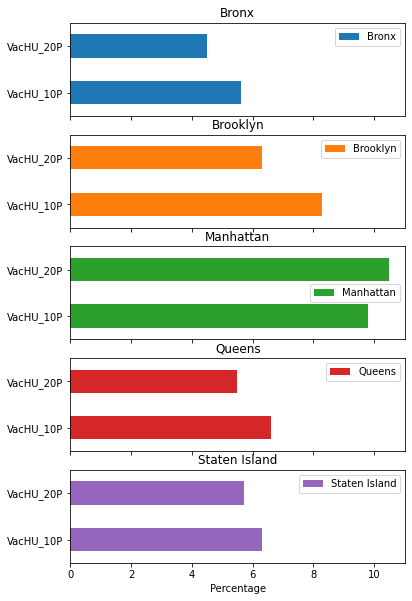

In [ ]:
#Graph 2 (Vacancy Rate per borough)

Table2.plot(kind='barh', subplots=True)
plt.subplots_adjust(top=2)
plt.xlabel("Percentage")

In [ ]:
#Graph 3 (Vacant Houses per borough for 2010 and 2020)

import plotly.express as px

df = pd.read_excel(xls, '2010, 2020, and Change', skiprows=[0,1,2], usecols=['GeoID','Borough','Name','Pop_10','Pop_10P','HHPop_10','HHPop_10P','AvHHSz_10','Hsp_10','Hsp_10P','WNH_10','WNH_10P','BNH_10','BNH_10P','ANH_10','ANH_10P','HUnits_10','HUnits_10P','OcHU_10','OcHU_10P','VacHU_10','VacHU_10P','Pop_20','Pop_20P','HHPop_20','HHPop_20P','AvHHSz_20','Hsp_20','Hsp_20P','WNH_20','WNH_20P','BNH_20','BNH_20P','ANH_20','ANH_20P','HUnits_20','HUnits_20P','OcHU_20','OcHU_20P','VacHU_20','VacHU_20P','Pop_Ch','Pop_PCh','HHPop_Ch','HHPop_PCh','AvHHSz_Ch','AvHHSz_PCh','Hsp_Ch','Hsp_PCh','WNH_Ch','WNH_PCh','BNH_Ch','BNH_PCh','ANH_Ch','ANH_PCh','HUnits_Ch','HUnits_PCh','OcHU_Ch','OcHU_PCh','VacHU_Ch','VacHU_PCh'])
df = df[["Borough", "VacHU_10","VacHU_20"]]
df = df[(df.Borough!="New York City")]
df.reset_index(drop=True, inplace=True)
df.set_index(['Borough'], inplace=True)

fig = px.pie(df, values='VacHU_10', names=df.index, title='Vacant Houses in 2010')

fig2 = px.pie(df, values='VacHU_20', names=df.index, title='Vacant Houses in 2020')
fig.show()
fig2.show()


Text(0.5, 0, 'Percentage')

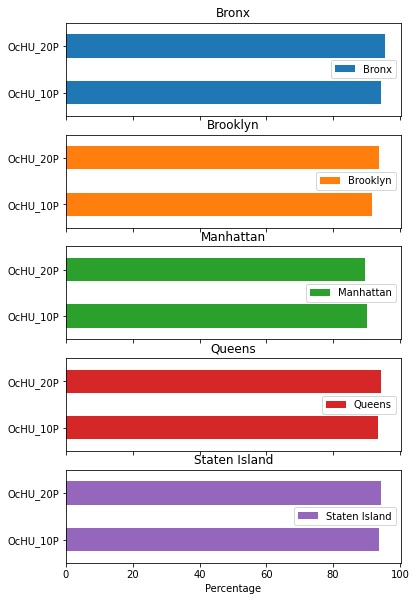

In [ ]:
#Graph 4 (Occupancy rate per borough)

Table1.plot(kind='barh', subplots=True)
plt.subplots_adjust(top=2)
plt.xlabel("Percentage")

Text(0, 0.5, 'Average Household Size')

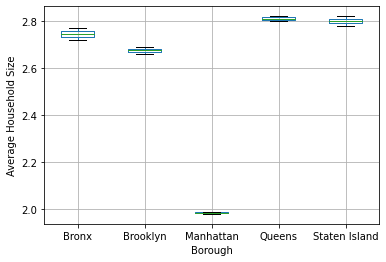

In [ ]:
#Graph 5 (Average household size per borough)

Table3.boxplot()
plt.xlabel('Borough')
plt.ylabel('Average Household Size')

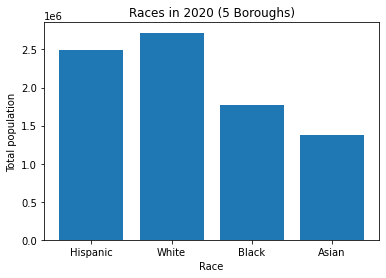

In [ ]:
#Graph 6 (Races Graph for 2020)

df = pd.read_excel(xls, '2010, 2020, and Change', skiprows=[0,1,2], usecols=['GeoID','Borough','Name','Pop_10','Pop_10P','HHPop_10','HHPop_10P','AvHHSz_10','Hsp_10','Hsp_10P','WNH_10','WNH_10P','BNH_10','BNH_10P','ANH_10','ANH_10P','HUnits_10','HUnits_10P','OcHU_10','OcHU_10P','VacHU_10','VacHU_10P','Pop_20','Pop_20P','HHPop_20','HHPop_20P','AvHHSz_20','Hsp_20','Hsp_20P','WNH_20','WNH_20P','BNH_20','BNH_20P','ANH_20','ANH_20P','HUnits_20','HUnits_20P','OcHU_20','OcHU_20P','VacHU_20','VacHU_20P','Pop_Ch','Pop_PCh','HHPop_Ch','HHPop_PCh','AvHHSz_Ch','AvHHSz_PCh','Hsp_Ch','Hsp_PCh','WNH_Ch','WNH_PCh','BNH_Ch','BNH_PCh','ANH_Ch','ANH_PCh','HUnits_Ch','HUnits_PCh','OcHU_Ch','OcHU_PCh','VacHU_Ch','VacHU_PCh'])

df = df[1:6][["Hsp_20","WNH_20","BNH_20","ANH_20"]]
#df1 = df[["Hsp_20","WNH_20","BNH_20","ANH_20"]]
y = df.sum()
X = ["Hispanic", "White", "Black", "Asian"]

plt.bar(X, y)
plt.title('Races in 2020 (5 Boroughs)')
plt.xlabel('Race')
plt.ylabel('Total population')
plt.show()

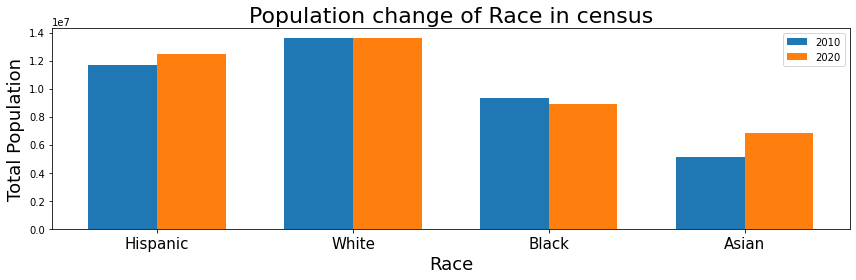

In [ ]:
#Graph 7 (Population change of Race in census)

df = pd.read_excel(xls, '2010, 2020, and Change', skiprows=[0,1,2], usecols=['GeoID','Borough','Name','Pop_10','Pop_10P','HHPop_10','HHPop_10P','AvHHSz_10','Hsp_10','Hsp_10P','WNH_10','WNH_10P','BNH_10','BNH_10P','ANH_10','ANH_10P','HUnits_10','HUnits_10P','OcHU_10','OcHU_10P','VacHU_10','VacHU_10P','Pop_20','Pop_20P','HHPop_20','HHPop_20P','AvHHSz_20','Hsp_20','Hsp_20P','WNH_20','WNH_20P','BNH_20','BNH_20P','ANH_20','ANH_20P','HUnits_20','HUnits_20P','OcHU_20','OcHU_20P','VacHU_20','VacHU_20P','Pop_Ch','Pop_PCh','HHPop_Ch','HHPop_PCh','AvHHSz_Ch','AvHHSz_PCh','Hsp_Ch','Hsp_PCh','WNH_Ch','WNH_PCh','BNH_Ch','BNH_PCh','ANH_Ch','ANH_PCh','HUnits_Ch','HUnits_PCh','OcHU_Ch','OcHU_PCh','VacHU_Ch','VacHU_PCh'])
df = df[["Hsp_10","WNH_10","BNH_10","ANH_10","Hsp_20","WNH_20","BNH_20","ANH_20"]]
X = ["Hispanic", "White", "Black", "Asian"]

Y = df.sum().values
Y = Y.reshape(2,4)
Y.shape

num_ticks = 4
x=np.linspace(0,8,num_ticks,dtype=np.int)
labels = ["Hispanic", "White", "Black", "Asian"]
Y1 = Y[0]
Y2 = Y[1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[12,4])
rects1 = ax.bar(x - width/2, Y1, width, label='2010')
rects2 = ax.bar(x + width/2, Y2, width, label='2020')

# Add some text for labels, title and custom x-axis tick labels.
ax.set_xlabel('Race', fontsize=18)
ax.set_ylabel('Total Population', fontsize=18)
ax.set_title('Population change of Race in census', fontsize=22)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=15)
ax.legend()

#Code to add numbers to the chart
# for index,data in enumerate(Y1):
#     plt.text(x=index , y=data+5 , s=f"{data}" , fontdict=dict(fontsize=20))
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

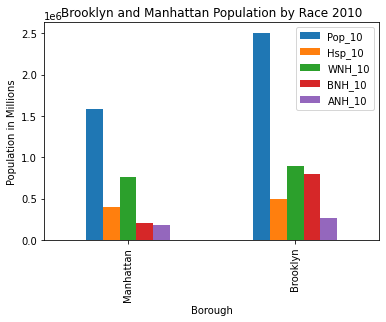

In [ ]:
#Graph 8 (Brooklyn and Manhattan Population by Race 2010)


#mnhn_bklyn2010 = mnhn_bklyn10.set_index('Borough')
#mnhn_bklyn2010


import matplotlib.pyplot as plt
mnhn_bklyn2010.plot(kind='bar')
plt.title('Brooklyn and Manhattan Population by Race 2010')
plt.ylabel('Population in Millions', rotation = 90)
plt.legend(loc=1)


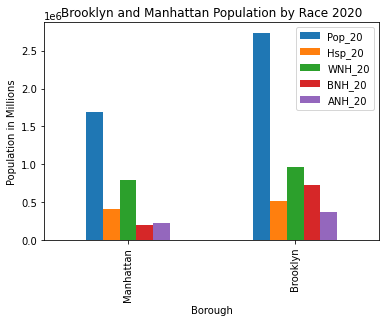

In [ ]:
#Graph 9 (Brooklyn and Manhattan Population by Race 2020)


mnhn_bklyn2020 = mnhn_bklyn20.set_index('Borough')
mnhn_bklyn2020


mnhn_bklyn2020.plot(kind='bar')
plt.title('Brooklyn and Manhattan Population by Race 2020')
plt.ylabel('Population in Millions', rotation = 90)
plt.legend(loc=1)

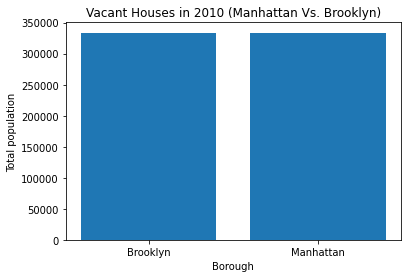

Borough
Brooklyn     333748
Manhattan    332726
Name: VacHU_10, dtype: int64

In [ ]:
#Graph 10 (Vacant Houses in 2010 (Manhattan Vs. Brooklyn))


#Vacant Houses Graph for 2010

#First bring in the column names
df = pd.read_excel(xls, '2010, 2020, and Change', skiprows=[0,1,2], usecols=['GeoID','Borough','Name','Pop_10','Pop_10P','HHPop_10','HHPop_10P','AvHHSz_10','Hsp_10','Hsp_10P','WNH_10','WNH_10P','BNH_10','BNH_10P','ANH_10','ANH_10P','HUnits_10','HUnits_10P','OcHU_10','OcHU_10P','VacHU_10','VacHU_10P','Pop_20','Pop_20P','HHPop_20','HHPop_20P','AvHHSz_20','Hsp_20','Hsp_20P','WNH_20','WNH_20P','BNH_20','BNH_20P','ANH_20','ANH_20P','HUnits_20','HUnits_20P','OcHU_20','OcHU_20P','VacHU_20','VacHU_20P','Pop_Ch','Pop_PCh','HHPop_Ch','HHPop_PCh','AvHHSz_Ch','AvHHSz_PCh','Hsp_Ch','Hsp_PCh','WNH_Ch','WNH_PCh','BNH_Ch','BNH_PCh','ANH_Ch','ANH_PCh','HUnits_Ch','HUnits_PCh','OcHU_Ch','OcHU_PCh','VacHU_Ch','VacHU_PCh'])

#Store data for the needed columns representing vacant houses in all boroughs
df2 = df[["Borough", "VacHU_10","VacHU_20"]]

#Store data to focus on only 2 boroughs. Manhattan and Brooklyn
df2 = df2[(df2.Borough=="Manhattan") | (df2.Borough=="Brooklyn")]

#Group together Manhattan then get the sum of that group. Likewise for Brooklyn
grouped = df2.groupby("Borough").sum()

#Seperate the 2 groups and represent the Borough title on the x axis
X = ["Brooklyn", "Manhattan"]

#Using the sum value for the 2 groups, represent the 2 groups seperate on the y axis
y = grouped["VacHU_10"]

#Use matplotlib to visualize the bar graph
plt.bar(X, y)
plt.title('Vacant Houses in 2010 (Manhattan Vs. Brooklyn)')
plt.xlabel('Borough')
plt.ylabel('Total population')
plt.show()

y

Text(0, 0.5, 'Percentage')

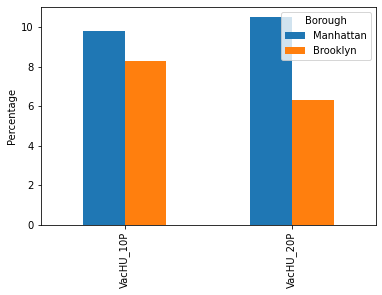

In [ ]:
#Graph 11 (Percent of Occupied Units in Brooklyn and Manhattan)

Table2[['Manhattan', 'Brooklyn']].plot(kind='bar')
plt.ylabel('Percentage')

In [ ]:
#Graph 12 (Vacant Houses for 2010 and 2020 (Brooklyn and Manahttan))

xls = pd.ExcelFile('https://www1.nyc.gov/assets/planning/download/office/planning-level/nyc-population/census2020/nyc_decennialcensusdata_2020_2010.xlsx')
df = pd.read_excel(xls, '2010, 2020, and Change', skiprows=[0,1,2], usecols=['GeoID','Borough','Name','Pop_10','Pop_10P','HHPop_10','HHPop_10P','AvHHSz_10','Hsp_10','Hsp_10P','WNH_10','WNH_10P','BNH_10','BNH_10P','ANH_10','ANH_10P','HUnits_10','HUnits_10P','OcHU_10','OcHU_10P','VacHU_10','VacHU_10P','Pop_20','Pop_20P','HHPop_20','HHPop_20P','AvHHSz_20','Hsp_20','Hsp_20P','WNH_20','WNH_20P','BNH_20','BNH_20P','ANH_20','ANH_20P','HUnits_20','HUnits_20P','OcHU_20','OcHU_20P','VacHU_20','VacHU_20P','Pop_Ch','Pop_PCh','HHPop_Ch','HHPop_PCh','AvHHSz_Ch','AvHHSz_PCh','Hsp_Ch','Hsp_PCh','WNH_Ch','WNH_PCh','BNH_Ch','BNH_PCh','ANH_Ch','ANH_PCh','HUnits_Ch','HUnits_PCh','OcHU_Ch','OcHU_PCh','VacHU_Ch','VacHU_PCh'])
df = df[(df.Borough=="Manhattan") | (df.Borough=="Brooklyn")]
X = ["Brooklyn", "Manhattan"]
temp = df.groupby("Borough").sum()
data = temp.reset_index()
data = data[["Borough",'VacHU_10','VacHU_20']]
temp_2 = pd.melt(data, id_vars=['Borough'], value_vars=['VacHU_10','VacHU_20'])
fig = px.bar(temp_2,x="Borough", y="value", color="variable")
fig.show()

In [ ]:
**Refrences/Citations:**

1.  https://nypost.com/article/nyc-real-estate-market-housing-prices/
2.  https://streeteasy.com/blog/q3-2020-market-reports/
3.  https://datatofish.com/select-rows-pandas-dataframe/
4.  https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
5.  https://pandas.pydata.org/docs/user_guide/index.html
6.  https://plotly.com/python/bar-charts/